# Engenharia de Machine Learning [25E1_3]
## Data 26/03/2025


## Import das bibliotecas

In [13]:
from pycaret.classification import *
from sklearn.metrics import log_loss

# Carregando as bases

In [14]:
# Carregando as bases do Kedro
train = catalog.load('base_train')
test = catalog.load('base_test')

[04/11/25 17:16:24] INFO     Loading data from base_train (ParquetDataSet)...                   ]8;id=824316;file:///home/zeta/miniconda3/envs/kedro/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=721355;file:///home/zeta/miniconda3/envs/kedro/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from base_test (ParquetDataSet)...                    ]8;id=435304;file:///home/zeta/miniconda3/envs/kedro/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=479118;file:///home/zeta/miniconda3/envs/kedro/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

In [15]:
# variáveis com os campos necessários para os enunciados
# todos os campos 
features_all = ['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs', 'season', 'seconds_remaining', 'shot_distance', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id']
features =  ['lat', 'lon', 'minutes_remaining', 'period', 'playoffs', 'shot_distance']
target = ['shot_made_flag']

seed = 42

# Experiments

In [16]:
exp = ClassificationExperiment()
exp.setup(
    data=train,
    target='shot_made_flag',
    session_id = seed,
    log_experiment= 'mlflow',
    experiment_name='Evaluation'
)

,Description,Value
0,Session id,42
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(20557, 7)"
4,Transformed data shape,"(20557, 7)"
5,Transformed train set shape,"(14389, 7)"
6,Transformed test set shape,"(6168, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [17]:
# Carrega o modelo
model = catalog.load('logistic_regression_model')
model_lr = model['model']

[04/11/25 17:16:26] INFO     Loading data from logistic_regression_model (PickleDataSet)...     ]8;id=970802;file:///home/zeta/miniconda3/envs/kedro/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=693302;file:///home/zeta/miniconda3/envs/kedro/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

## Avaliando o modelo

In [18]:
exp.evaluate_model(model_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Fazendo um gráfico SHAP

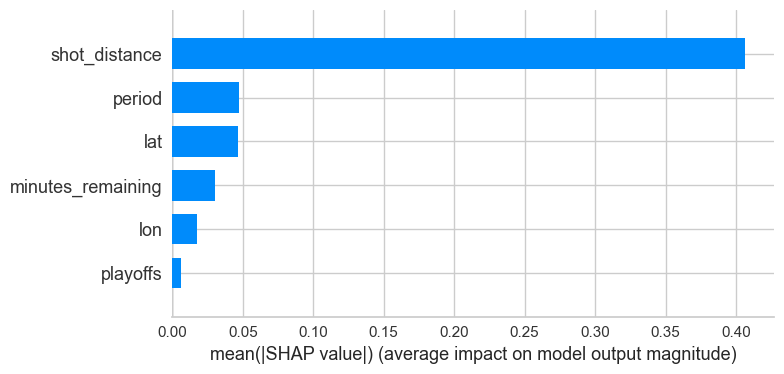

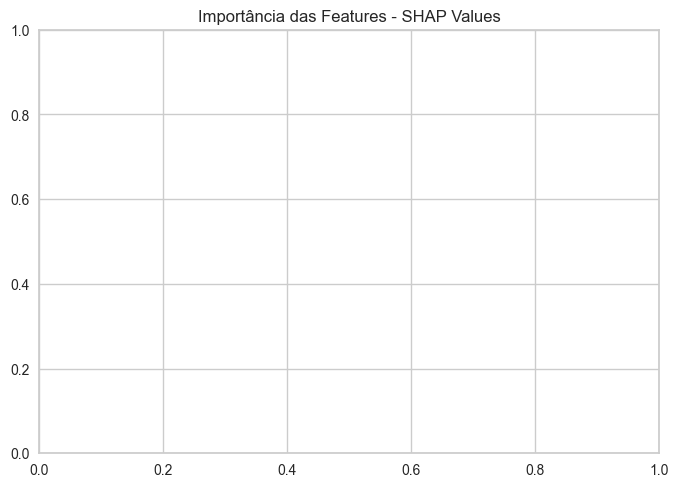

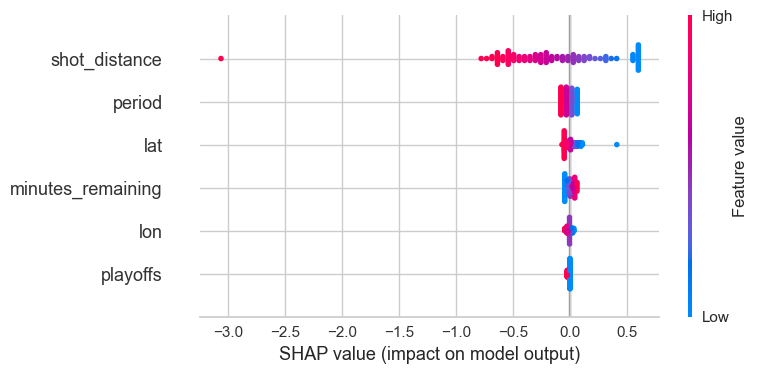

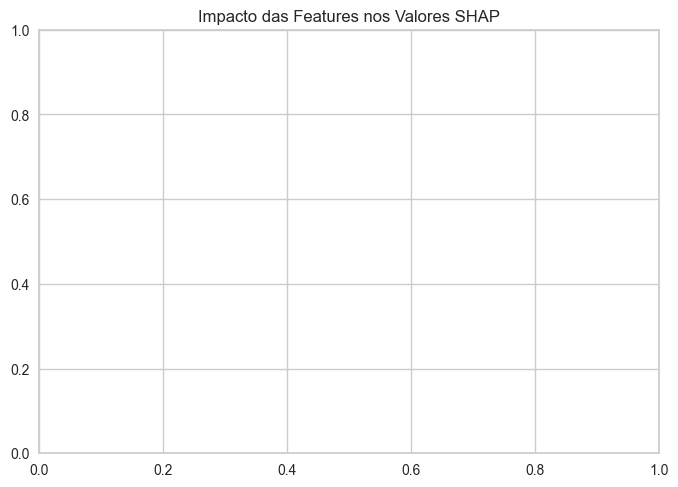

In [25]:
import shap
import matplotlib.pyplot as plt

# Preparando os dados
X_train = train[features]
y_train = train[target]

# Criando o explainer SHAP
explainer = shap.Explainer(model_lr, X_train)
# Calculando os valores SHAP para um conjunto de amostras (vamos usar 100 amostras para performance)
shap_values = explainer(X_train.sample(100, random_state=42))

# Plotando o gráfico de resumo SHAP
shap.summary_plot(shap_values, X_train.sample(100, random_state=42), plot_type="bar")
plt.title("Importância das Features - SHAP Values")
plt.show()

# Gráfico mais detalhado mostrando o impacto de cada feature
shap.summary_plot(shap_values, X_train.sample(100, random_state=42))
plt.title("Impacto das Features nos Valores SHAP")
plt.show()

# Por: `Eder Martins`

## Obrigado!